<a href="https://colab.research.google.com/github/phanducminh201/Model_training_in_ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# **DATA PREPROCESSING**

In [ ]:
df = pd.read_csv('real_estate_dataset.csv')
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [ ]:
df=df.drop('ID', axis=1)

In [ ]:
current_year = 2024
df['Age'] = current_year - df['Year_Built']
df=df.drop('Year_Built', axis=1)

In [ ]:
df.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price,Age
0,143.635030,1,3,3,1,1,48,8.297631,5.935734,602134.816747,57
1,287.678577,1,2,1,0,1,37,6.061466,10.827392,591425.135386,75
2,232.998485,1,3,2,1,0,14,2.911442,6.904599,464478.696880,101
3,199.664621,5,2,2,0,0,17,2.070949,8.284019,583105.655996,106
4,89.004660,4,3,3,1,0,34,1.523278,14.648277,619879.142523,25


In [ ]:
df.isnull().sum()

,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0
Distance_to_Center,0
Price,0


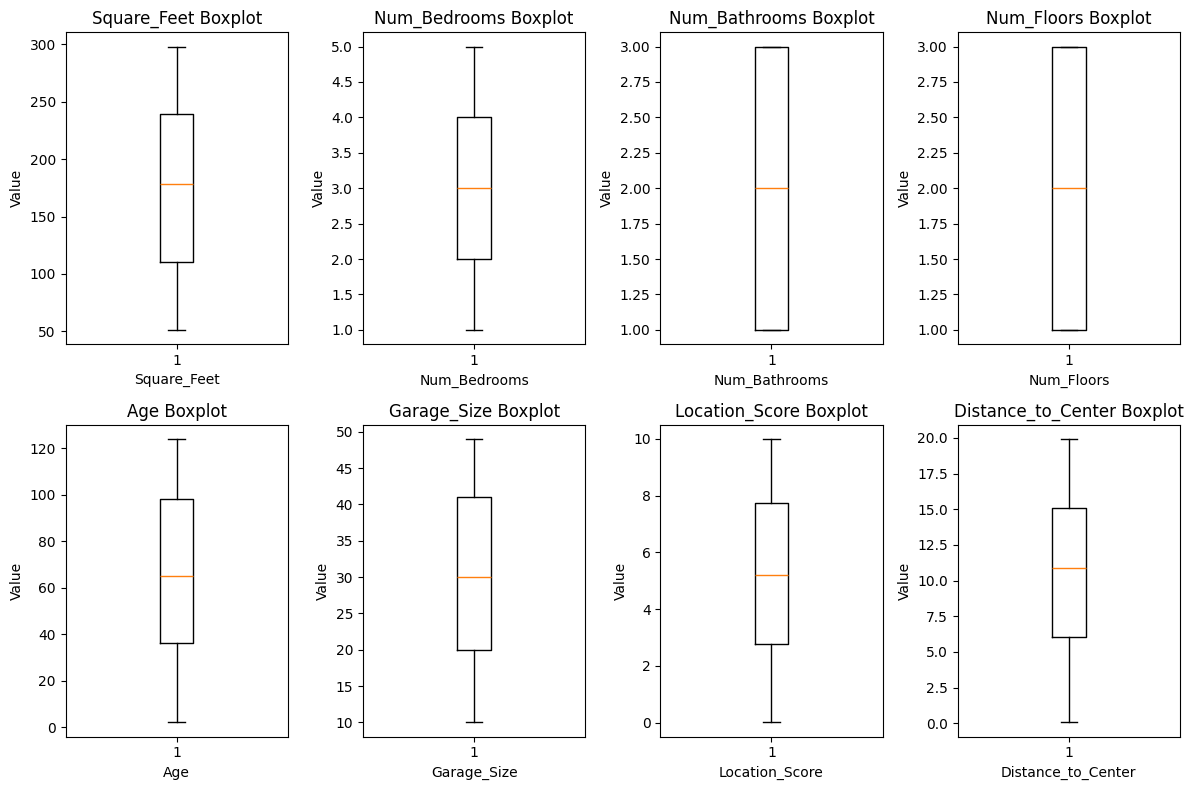

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))  # 2x2 subplots

axes[0, 0].boxplot(df['Square_Feet'])
axes[0, 0].set_title("Square_Feet Boxplot")
axes[0, 0].set_xlabel("Square_Feet")
axes[0, 0].set_ylabel("Value")

axes[0, 1].boxplot(df['Num_Bedrooms'])
axes[0, 1].set_title("Num_Bedrooms Boxplot")
axes[0, 1].set_xlabel("Num_Bedrooms")
axes[0, 1].set_ylabel("Value")

axes[0, 2].boxplot(df['Num_Bathrooms'])
axes[0, 2].set_title("Num_Bathrooms Boxplot")
axes[0, 2].set_xlabel("Num_Bathrooms")
axes[0, 2].set_ylabel("Value")

axes[0, 3].boxplot(df['Num_Floors'])
axes[0, 3].set_title("Num_Floors Boxplot")
axes[0, 3].set_xlabel("Num_Floors")
axes[0, 3].set_ylabel("Value")

axes[1, 0].boxplot(df['Age'])
axes[1, 0].set_title("Age Boxplot")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Value")

axes[1, 1].boxplot(df['Garage_Size'])
axes[1, 1].set_title("Garage_Size Boxplot")
axes[1, 1].set_xlabel("Garage_Size")
axes[1, 1].set_ylabel("Value")

axes[1, 2].boxplot(df['Location_Score'])
axes[1, 2].set_title("Location_Score Boxplot")
axes[1, 2].set_xlabel("Location_Score")
axes[1, 2].set_ylabel("Value")

axes[1, 3].boxplot(df['Distance_to_Center'])
axes[1, 3].set_title("Distance_to_Center Boxplot")
axes[1, 3].set_xlabel("Distance_to_Center")
axes[1, 3].set_ylabel("Value")

plt.tight_layout()
plt.show()

<Axes: >

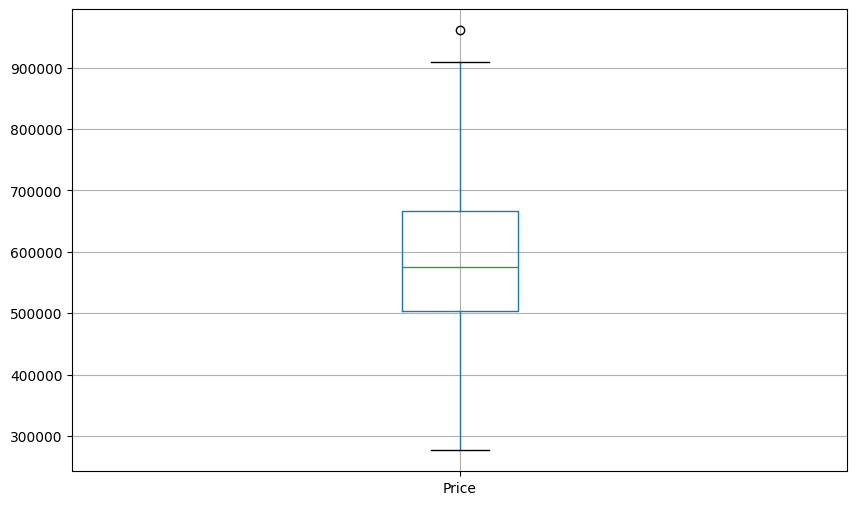

In [ ]:
df[['Price']].boxplot(figsize=(10, 6))

$$GHD = Q1 - 1.5IQR$$
$$GHT = Q3 + 1.5IQR$$

In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gioi_han_duoi = Q1 - 1.5 * IQR
gioi_han_tren = Q3 + 1.5 * IQR

df = df[(df['Price'] >= gioi_han_duoi) & (df['Price'] <= gioi_han_tren)]

156232.03510524612


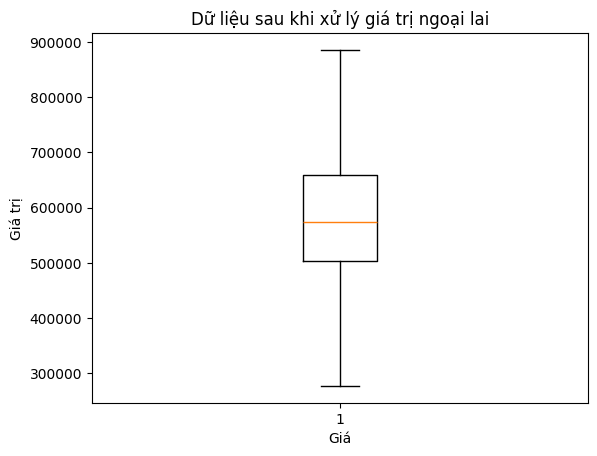

In [ ]:
plt.boxplot(df['Price'])
plt.title('Dữ liệu sau khi xử lý giá trị ngoại lai')
plt.xlabel("Giá")
plt.ylabel("Giá trị")
plt.show()

In [ ]:
X = df.drop('Price', axis=1)
y = df.Price

$X' = \frac{X - \mu}{σ}$

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# **MODEL TRAINING**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 150
number of training samples: 349


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

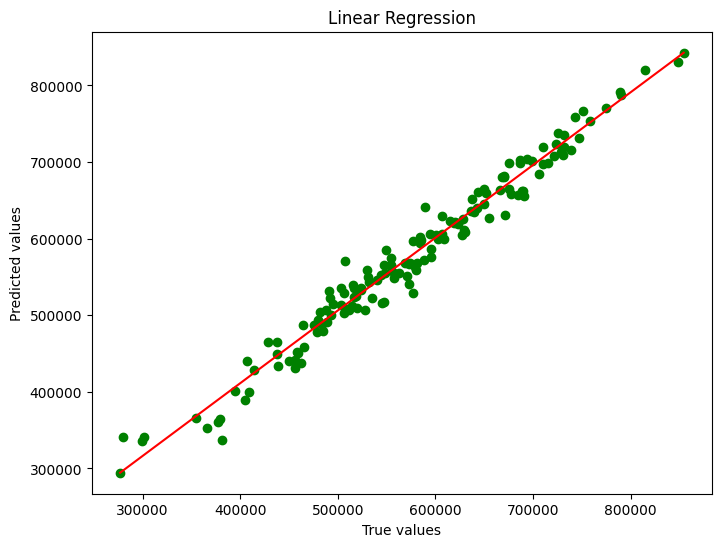

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color = 'green')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.show()

$w = (X^TX)^{-1}X^Ty$

In [ ]:
A = np.dot(X_train.T, X_train)
b = np.dot(X_train.T, y_train)
w = np.dot(np.linalg.pinv(A), b)
w

array([ 77828.16240434,  64254.26512258,  33181.51554693,  10655.93909228,
        10923.47095833,  43854.20612401,   7661.74082052,  34818.58570866,
       -23447.72144899, -81300.8201708 ])

In [ ]:
w.shape

(10,)

In [ ]:
# w = model.coef_
# w

In [ ]:
b = model.intercept_
b

581838.3876052669

In [ ]:
x_min = int(np.min(X_test))
x_max = int(np.max(X_test))
data_x = np.linspace(x_min, x_max, 10)
data_x_matrix = np.column_stack([data_x for _ in range(len(w))])
data_y = np.dot(data_x_matrix, w) + b

In [ ]:
data_x

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [ ]:
data_x.shape

(10,)

In [ ]:
data_x_matrix.shape

(10, 10)

In [ ]:
data_y

array([403409.04344741, 443060.00881582, 482710.97418423, 522361.93955265,
       562012.90492106, 601663.87028947, 641314.83565789, 680965.8010263 ,
       720616.76639471, 760267.73176313])

In [ ]:
min_x = int(np.min(y_test))
max_x = int(np.max(y_test))
x_data = np.linspace(min_x, max_x, 10)

In [ ]:
x_data.shape

(10,)

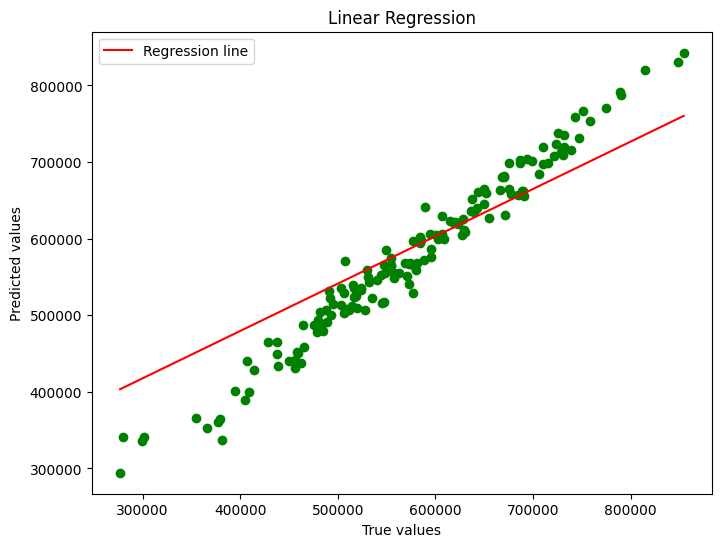

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color = 'green')
plt.plot(x_data, data_y, color = 'red', label = "Regression line")
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.legend()
plt.show()

# **MODEL EVALUATION**

Công thức tính phương sai:  $$Var(y) = \frac{1}{N}\sum_{i=1}^{N} (y_i - \bar{y})^2$$
Công thức tính MSE: $$MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(data_y, y_pred[:10])
variance = np.var(data_y)

print(f"MSE: {mse}")
print(f"Variance of y: {variance}")

MSE: 21816289468.441956
Variance of y: 12970642200.838629
